In [1]:
import numpy as np
from matplotlib import pyplot,cm as plt,cm
from scipy.interpolate import *
from ReferenceElement import *
import os
import imageio
from DG_functions_wave_inhomogeneous_with_potential import *

In [96]:
N = 30
K = 1
CF = 2.**(-7)
start = 0.
end = 1.
a1 = 1.
a2 = -1.
alpha = 0.
h = (end-start)/K

In [97]:
reference_element = ReferenceElement(N)
reference_interval = reference_element[0]
M_inv = reference_element[1]*2/h
M_inv_S = reference_element[2]*2/h

In [98]:
def u_test(x,t,x0,stdev):
    return 1/np.sqrt(2*np.pi*stdev**2)*np.exp(-(x-x0-t)**2/(2*stdev**2))
    #return 0*x
def delta_source(t):
    return 0*t

In [88]:
x = get_x_elements(start,end, K, reference_interval)
dx_min = get_dx_min(x)

In [89]:
t = 0.
t_target = 0.4
dt = CF*dx_min
nt = int((t_target-t)/dt)
print (nt)

12989


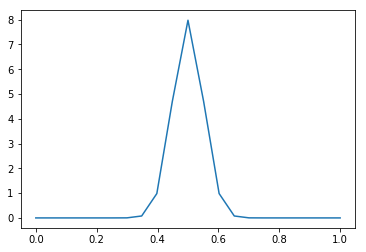

In [90]:
x0 = 0.5
stdev= 0.05
u = u_test(x,0,x0,stdev)
plt.plot(x.flatten(), u.flatten())
#u[0] = 0

In [91]:
u[0]

array([1.53891973e-21, 3.37464135e-21, 2.07155369e-20, 3.27731034e-19,
       1.18871667e-17, 8.49197714e-16, 9.97478374e-14, 1.57480699e-11,
       2.69783462e-09, 4.03462480e-07, 4.26208158e-05, 2.61147855e-03,
       7.79859194e-02, 9.83172405e-01, 4.70092629e+00, 7.97884561e+00,
       4.70092629e+00, 9.83172405e-01, 7.79859194e-02, 2.61147855e-03,
       4.26208158e-05, 4.03462480e-07, 2.69783462e-09, 1.57480699e-11,
       9.97478374e-14, 8.49197714e-16, 1.18871667e-17, 3.27731034e-19,
       2.07155369e-20, 3.37464135e-21, 1.53891973e-21])

In [92]:
# direc = "1D_advec_test_4"if os.path.isdir(direc):
#     print('Directory'+direc+'already exists')
# else:
#     os.makedirs(direc)
# images = []

In [93]:
for n in range(nt):
    u = RK4_Step(dt, DG_du_dt_radiative,u, K, N,t,a1,alpha, M_inv, M_inv_S, delta_source,v= None, potential = None)
    t +=dt
    
    """if n%500 ==0:
        plt.figure(figsize=(11, 7), dpi=100)
        for i in range(len(u)):
            plt.plot(x[i],u[i],marker ='o')
        plt.ylabel('u')
        plt.title('t = '+str(np.round(t,3)))
        plt.legend()
        name = direc+"/figure"+str(np.round(t,3))+'.png'
        plt.savefig(name)
        images.append(imageio.imread(name))
        plt.close()
gifName = direc+'/movie.gif'
imageio.mimsave(gifName,images)"""

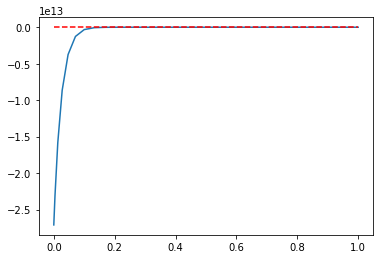

In [94]:
u_sol = u_test(x,t,x0,stdev)
for i in range(len(u)):
    plt.plot(x[i],u[i])
    plt.plot(x[i],u_sol[i],color = 'red', linestyle ='--')

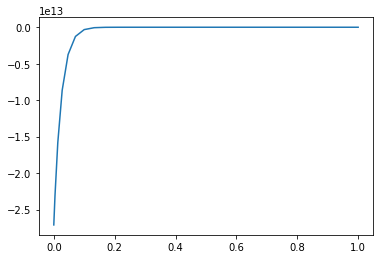

In [95]:
for i in range(len(u)):
    plt.plot(x[i],u[i]-u_sol[i])